In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hotel_bookings.csv")

df = df.sample(n=30000, random_state=42).reset_index(drop=True)

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,203,2016,December,49,2,2,5,2,...,No Deposit,250.0,NaN,0,Transient,66.8,0,0,Check-Out,2016-12-09
1,City Hotel,1,82,2015,July,29,16,0,3,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,0,Canceled,2015-07-16
2,City Hotel,0,25,2016,December,53,27,0,3,3,...,No Deposit,220.0,NaN,0,Transient-Party,60.0,0,1,Check-Out,2016-12-30
3,City Hotel,0,1,2016,March,11,9,0,1,1,...,No Deposit,9.0,NaN,0,Transient-Party,95.0,0,0,Check-Out,2016-03-10
4,City Hotel,0,70,2017,April,16,16,2,2,2,...,No Deposit,9.0,NaN,0,Transient,108.0,0,0,Check-Out,2017-04-20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           30000 non-null  object 
 1   is_canceled                     30000 non-null  int64  
 2   lead_time                       30000 non-null  int64  
 3   arrival_date_year               30000 non-null  int64  
 4   arrival_date_month              30000 non-null  object 
 5   arrival_date_week_number        30000 non-null  int64  
 6   arrival_date_day_of_month       30000 non-null  int64  
 7   stays_in_weekend_nights         30000 non-null  int64  
 8   stays_in_week_nights            30000 non-null  int64  
 9   adults                          30000 non-null  int64  
 10  children                        30000 non-null  float64
 11  babies                          30000 non-null  int64  
 12  meal                            

In [5]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             138
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4157
company                           28240


In [6]:
drop_cols = [
    'arrival_date_year',
    'babies',
    'country',
    'agent',
    'company',
    'required_car_parking_spaces',
    'reservation_status',
    'reservation_status_date',
    'arrival_date_week_number',
    'arrival_date_day_of_month'
]

df.drop(columns=drop_cols, inplace=True, errors='ignore')


In [7]:
# Children → replace NaN with 0
df['children'].fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_4656\3547865055.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


In [8]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
dtype: int64

In [9]:
df.shape

(30000, 22)

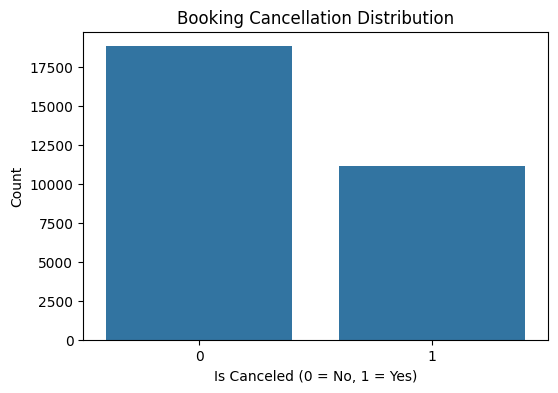

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_canceled', data=df)
plt.title("Booking Cancellation Distribution")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

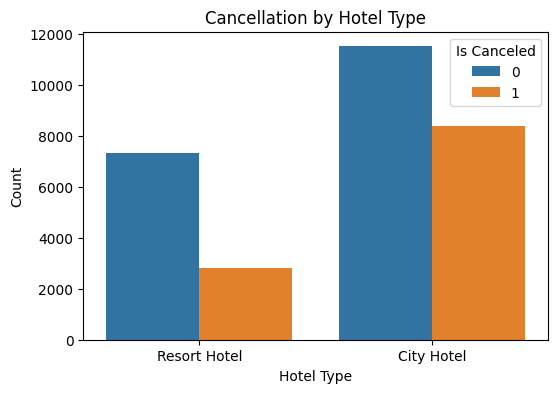

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title("Cancellation by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.legend(title="Is Canceled")
plt.show()

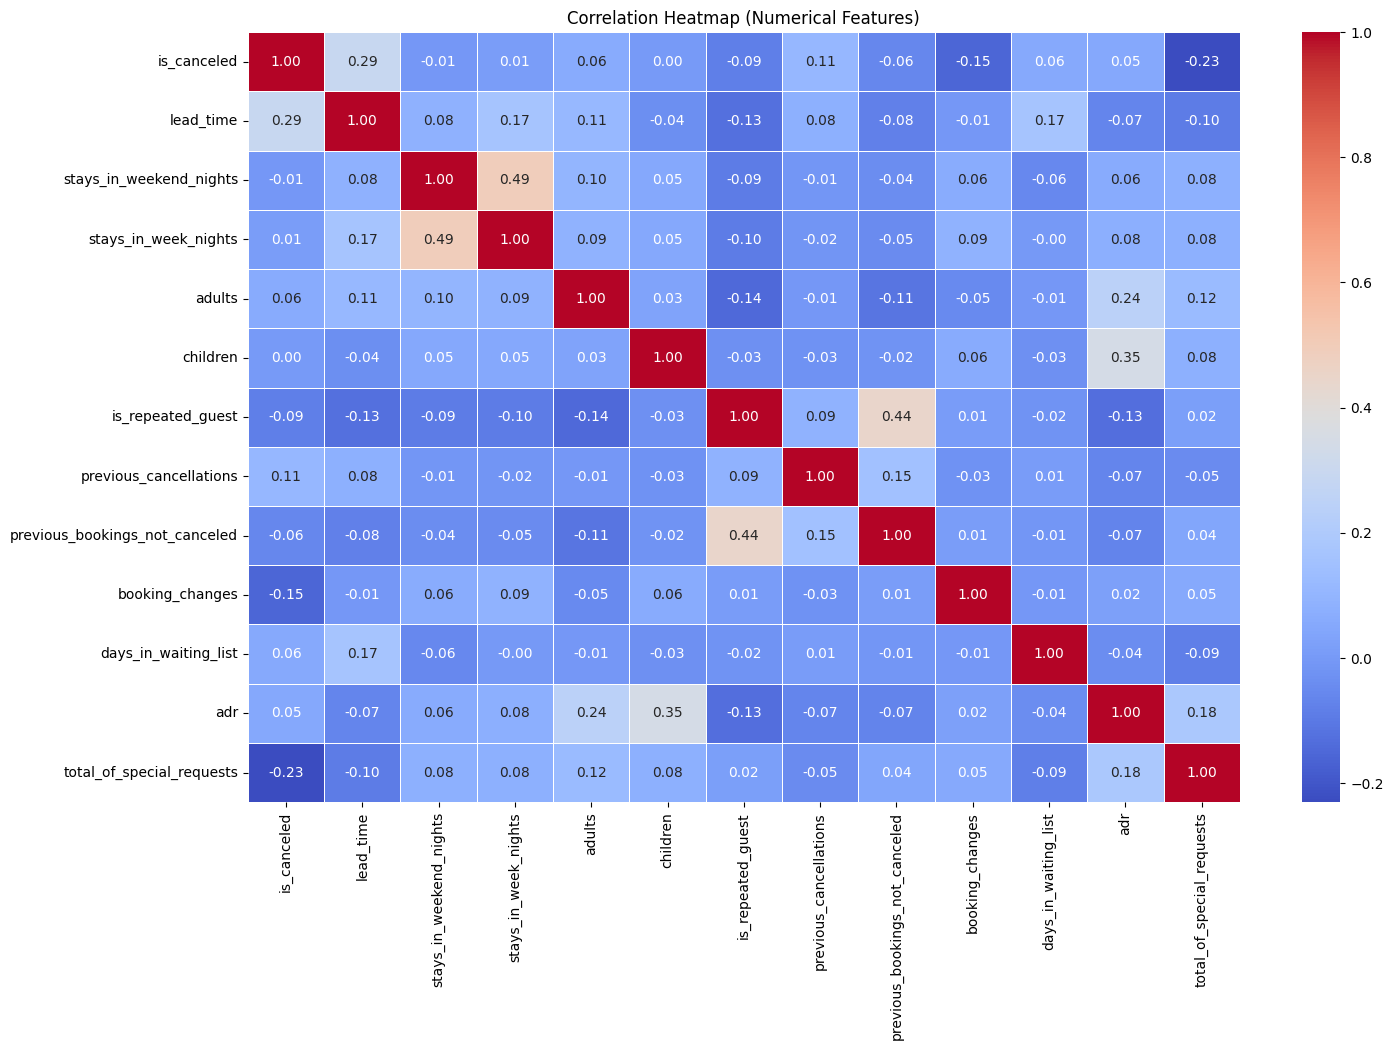

In [12]:
plt.figure(figsize=(16,10))

sns.heatmap(
    df.select_dtypes(include='number').corr(),
    cmap='coolwarm',
    annot=True,          # SHOW VALUES
    fmt=".2f",           # show 2 decimal points
    linewidths=0.5,      # line between cells
    cbar=True
)

plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [13]:
# Explicitly choose ONLY required categorical columns
cat_cols = [
    'hotel',
    'arrival_date_month',
    'meal',
    'deposit_type'
]

cat_cols


['hotel', 'arrival_date_month', 'meal', 'deposit_type']

In [14]:
# Explicitly choose ONLY required numerical columns
num_cols = [
    'lead_time',
    'adults',
    'children',
    'adr',
    'previous_cancellations',
    'total_of_special_requests'
]

num_cols


['lead_time',
 'adults',
 'children',
 'adr',
 'previous_cancellations',
 'total_of_special_requests']

In [15]:
# Target
y = df['is_canceled']

# Features (ONLY selected columns)
X = df[cat_cols + num_cols]


In [16]:
X.shape, y.shape

((30000, 10), (30000,))

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# FINAL selected categorical columns
cat_cols = [
    'hotel',
    'arrival_date_month',
    'meal',
    'deposit_type'
]

# FINAL selected numerical columns
num_cols = [
    'lead_time',
    'adults',
    'children',
    'adr',
    'previous_cancellations',
    'total_of_special_requests'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)


In [19]:
preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [20]:
df.shape

(30000, 22)

In [21]:
cat_cols

['hotel', 'arrival_date_month', 'meal', 'deposit_type']

In [22]:
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [23]:
# Applying SMOTE on training data

# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)

# X_train_resampled, y_train_resampled = smote.fit_resample(
#     X_train_encoded, y_train
# )

# 2. Compute class weight (ONLY once)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

In [24]:
# Training Models
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_encoded, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train_encoded, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    random_state=42
)

gb_model.fit(X_train_encoded, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,150
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [27]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_encoded, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    }

In [29]:
results = {
    "Logistic Regression": evaluate_model(lr_model, X_test_encoded, y_test),
    "Random Forest": evaluate_model(rf_model, X_test_encoded, y_test),
    "Gradient Boosting": evaluate_model(gb_model, X_test_encoded, y_test),
    "XGBoost": evaluate_model(xgb_model, X_test_encoded, y_test),
}

import pandas as pd
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,ROC_AUC
Logistic Regression,0.777500,0.889273,0.459955,0.799722
Random Forest,0.803333,0.773742,0.667114,0.866874
Gradient Boosting,0.795500,0.850000,0.547651,0.842273
XGBoost,0.811833,0.852679,0.598210,0.860447


In [30]:
# Tuning- Random Forest

from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf_random = RandomizedSearchCV(
    rf_model,
    rf_params,
    n_iter=3,
    cv=2,
    scoring="roc_auc",
    random_state=42,
    n_jobs=1,
    verbose=1
)

rf_random.fit(X_train_encoded, y_train)
best_rf = rf_random.best_estimator_


Fitting 2 folds for each of 3 candidates, totalling 6 fits


In [31]:
# XGBoost

xgb_params = {
    "n_estimators": [200, 300, 500],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

xgb_random = RandomizedSearchCV(
    xgb_model,
    xgb_params,
    n_iter=25,
    cv=3,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

xgb_random.fit(X_train_encoded, y_train)
best_xgb = xgb_random.best_estimator_

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [32]:
tuned_results = {
    "Random Forest (Tuned)": evaluate_model(best_rf, X_test_encoded, y_test),
    "XGBoost (Tuned)": evaluate_model(best_xgb, X_test_encoded, y_test)
}

pd.DataFrame(tuned_results).T

,Accuracy,Precision,Recall,ROC_AUC
Random Forest (Tuned),0.807667,0.838871,0.598658,0.869669
XGBoost (Tuned),0.809000,0.830601,0.612081,0.865592


In [33]:
# XGBoost Model

final_model = best_xgb
final_model.fit(X_train_encoded, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [34]:
# prediction for unseen data

y_predicted = final_model.predict(X_test_encoded)

In [35]:
y_predicted.shape

(6000,)

In [36]:
# accuracy for unseen data

accuracy_score(y_test, y_predicted)

0.809

In [37]:
## model metrics

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3765
           1       0.83      0.61      0.70      2235

    accuracy                           0.81      6000
   macro avg       0.82      0.77      0.78      6000
weighted avg       0.81      0.81      0.80      6000



In [38]:
from sklearn.pipeline import Pipeline
import joblib

final_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", best_xgb)   
    ]
)

final_pipeline.fit(X_train, y_train)

joblib.dump(final_pipeline, "hotel_cancellation_xgb_pipeline.pkl")


['hotel_cancellation_xgb_pipeline.pkl']

In [39]:
y_test_proba = final_pipeline.predict_proba(X_test)[:, 1]

In [40]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

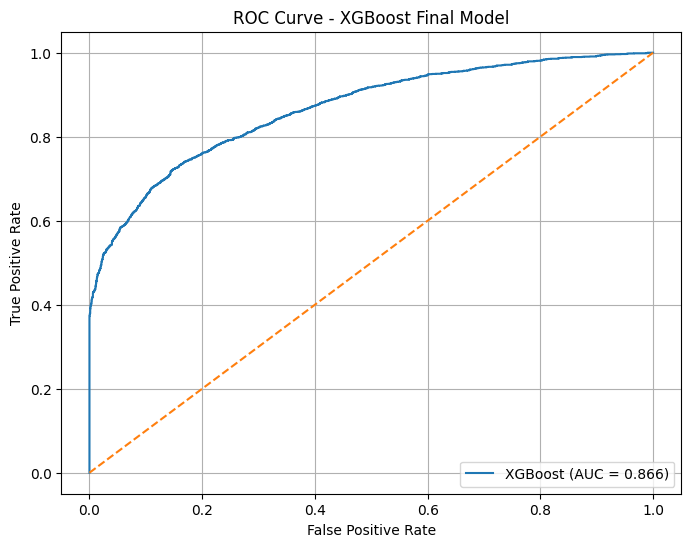

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Final Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [42]:
joblib.dump(final_pipeline, "hotel_cancellation_xgb_pipeline.pkl")

['hotel_cancellation_xgb_pipeline.pkl']